In [ ]:
from wishart import wishart_lib, wishart_lib_stepan
from motifs import motifs
import sys
sys.path.append("..")

from indexes import indexes_lib
from generator import generator_lib
import numpy as np
from matplotlib import pyplot as plt
import importlib
from scipy.interpolate import make_interp_spline, BSpline

import sys
sys.path.append("..")
importlib.reload(wishart_lib_stepan)
importlib.reload(wishart_lib)
importlib.reload(indexes_lib)
importlib.reload(generator_lib)
importlib.reload(motifs)


def smooth_plot(x, y, plt):
    xnew = np.linspace(x.min(), x.max(), 1000) 

    spl = make_interp_spline(x, np.array(y), k=3)
    power_smooth = spl(xnew)
    line, = plt.plot(xnew, power_smooth)
    return line

In [28]:
max_hor = 100
num = 10

In [32]:
results_ideal = np.load(f"superscript/super_metrics/h_{max_hor}_n={num}_pred.npy", allow_pickle=True)
num_bad_ideal = np.load(f"superscript/super_metrics/h_{max_hor}_n={num}_bad.npy", allow_pickle=True)
results = np.load(f"superscript/super_metrics/simple_h_{max_hor}_n={num}.npy", allow_pickle=True)

In [33]:
for i in range(len(results_ideal)):
    num_bad_ideal[i] = num_bad_ideal[i] * (i + 1) / 100

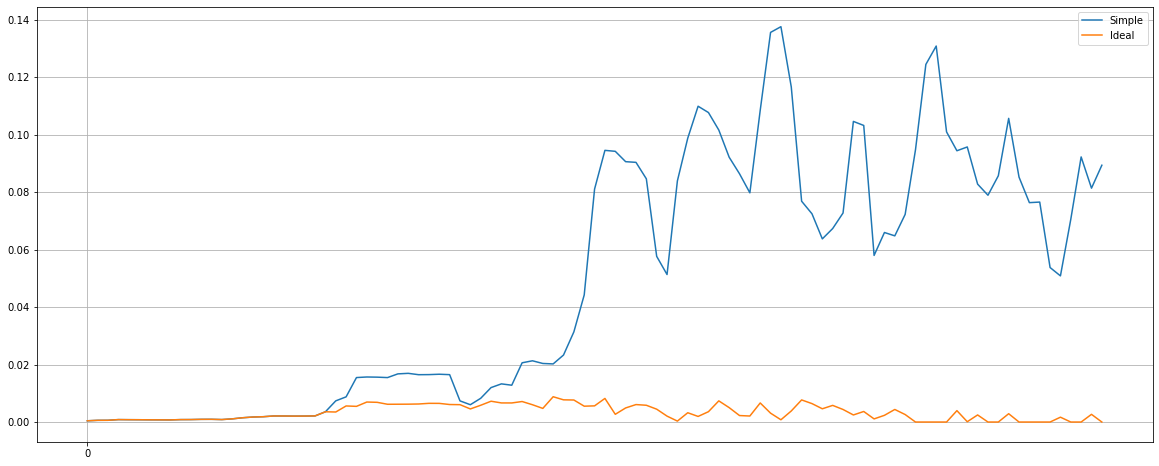

In [35]:
plt.figure(figsize=(20, 8))
l, = plt.plot(results[:-1])
l.set_label("Simple")
l, = plt.plot(results_ideal[:-1])
l.set_label("Ideal")
plt.legend()
plt.xticks([i for i in range(0, max_hor, 100)])
plt.grid()
plt.show()

In [47]:
num_bad_ideal = np.load(f"superscript/super_metrics/h_{1000}_n={100}_bad.npy", allow_pickle=True)
for i in range(len(num_bad_ideal)):
    num_bad_ideal[i] = num_bad_ideal[i] * (i + 1) / 100

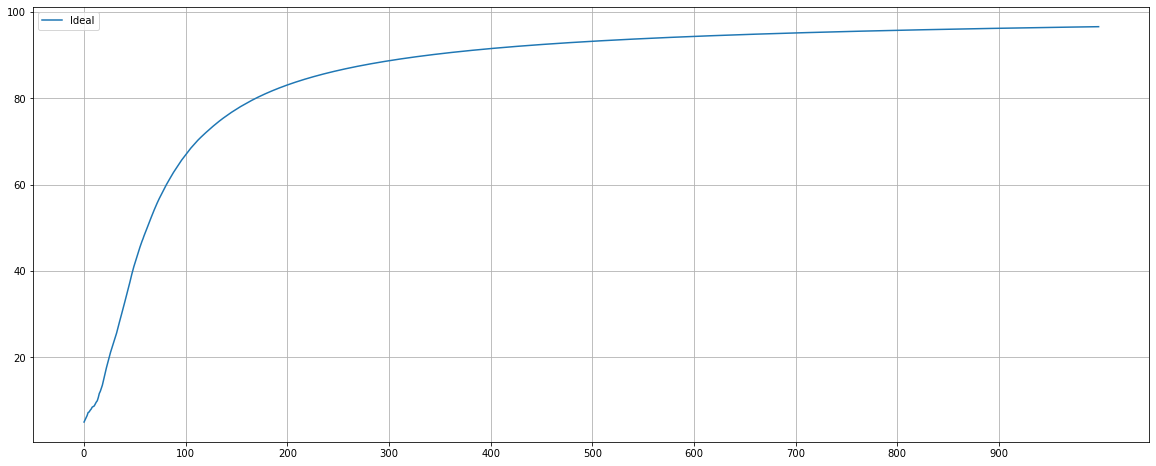

In [48]:

print(num_bad_ideal)
r = num_bad_ideal

# print(num_bad_ideal)
# print(r)
plt.figure(figsize=(20, 8))
# smooth_plot(np.array(range(1, 1000)), r, plt).set_label("Ideal")
l, = plt.plot(r)
l.set_label("Ideal")
plt.legend()
plt.xticks([i for i in range(0, 1000, 100)])
plt.grid()
plt.show()